
<a id='Step 1 Data Preprocessing'></a>
<h2> Step 1 Data Preprocessing </h2>
<h4> The dataset for this project contained a total of 14,589 records, including 13 attributes. These characteristics included demographic data, a range of health metrics, and desired results for diet and exercise recommendations. In the preprocessing stage, ID field were removed because they didn’t hold any meaningful relevance to the predictions. </h4><br>


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


# Load the dataset
file_path = 'gym and diet recommendation1.csv' 
data = pd.read_csv(file_path)

# Displaying basic dataset infromation
print("Dataset Overview:")
print(data.info())
print("\nFirst Five Rows:")
print(data.head())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14589 non-null  int64  
 1   Sex           14589 non-null  object 
 2   Age           14589 non-null  int64  
 3   Height(cms)   14589 non-null  float64
 4   Weight        14589 non-null  float64
 5   Hypertension  14589 non-null  object 
 6   Diabetes      14589 non-null  object 
 7   BMI           14589 non-null  float64
 8   Level         14589 non-null  object 
 9   Fitness Goal  14589 non-null  object 
 10  Fitness Type  14589 non-null  object 
 11  Exercises     14589 non-null  object 
 12  Diet          14589 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB
None

First Five Rows:
   ID   Sex  Age  Height(cms)  Weight Hypertension Diabetes    BMI  \
0   1  Male   18        168.0    47.5           No       No  16.83   
1  

<h2> Step 2 Cleaning Process </h2>
<h4> The purpose of the cleaning process is to make the dataset prepared for analysis and model training. There were many undefined value for Weight and BMI, so cleaned the data to make it realistic and this ensures that the data and accurate for model training. </h4>

In [2]:
# Applying corrections to the BMI column
def correct_bmi(value):
    if value >= 1000:  # If BMI is 4 digits
        return value / 100
    elif value > 100:  # If BMI is greater than 100
        return value / 10
    return value  # Return the value as is if already correct

# Applying corrections to the Weight column
def correct_weight(value):
    if value >= 200:  # If Weight is in 3 digits
        return value / 10
    return value  # Return the value as is if already correct

# Applying the corrected data to the columns of dataset
data['BMI'] = data['BMI'].apply(correct_bmi)
data['Weight'] = data['Weight'].apply(correct_weight)

# Saving the changes back to the same CSV file
data.to_csv(file_path, index=False)

print("BMI and Weight values corrected in the CSV file!")


BMI and Weight values corrected in the CSV file!


In [3]:
print(f"Max BMI: {data['BMI'].max()}")
print(f"Min BMI: {data['BMI'].min()}")
print(f"Max Weight: {data['Weight'].max()}")
print(f"Min Weight: {data['Weight'].min()}")


Max BMI: 49.54
Min BMI: 9.52
Max Weight: 130.0
Min Weight: 32.0


In [4]:
# Adjust thresholds based on data
data = data[(data['Weight'] < 150) & (data['BMI'] < 50)]  


<h2> Step 3 Visualizing the data </h2>
<h4> The purpose of the visualizing was to know more about the data and what are the important features that needs to be kept in mind when trainging the model. </h4>

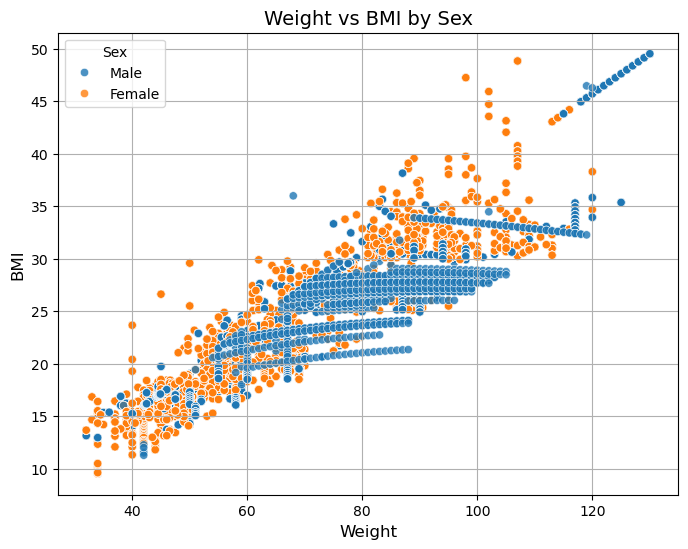

In [5]:
#These lines of code creates a scatter plot to visualize the relationshoip between Wieght and BMI, coloured by Sex.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Weight', y='BMI', hue='Sex', alpha=0.8)
plt.title('Weight vs BMI by Sex', fontsize=14)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(True)
plt.show()


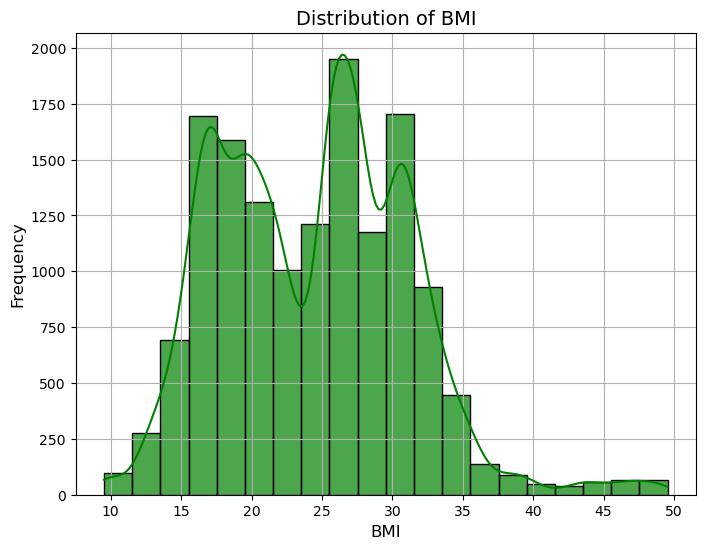

In [6]:
# These code lines creates a histogram to visualize the distribution of BMI values with a KDE curve.
plt.figure(figsize=(8, 6))
sns.histplot(data['BMI'], kde=True, bins=20, color='green', alpha=0.7)
plt.title('Distribution of BMI', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


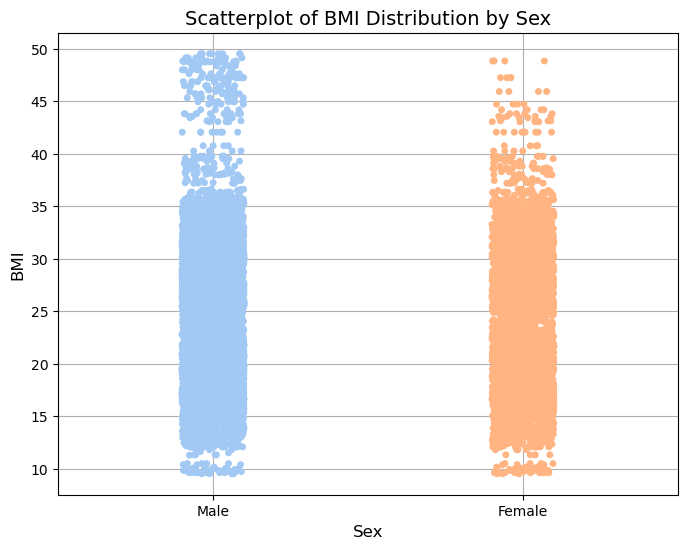

In [7]:
# Thwaw lines of code creates a strip plot to visualize the distribution of BMI values grouped by Sex, with jitter to avoid overlapping points.
plt.figure(figsize=(8, 6))

sns.stripplot(data=data, x='Sex', y='BMI', hue='Sex', jitter=True, palette='pastel')


plt.title('Scatterplot of BMI Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(True)
plt.show()


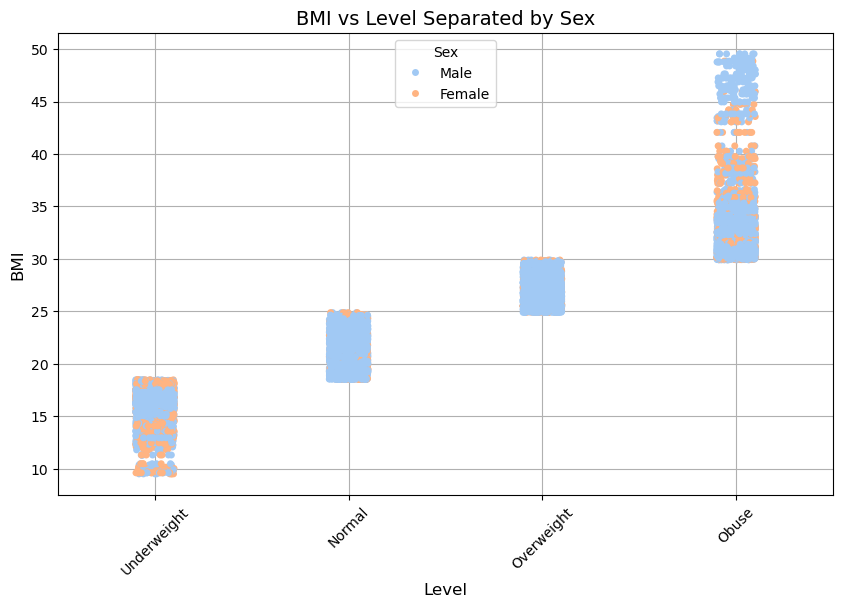

In [8]:
# These code lines creates a strip plot to visualize the relationship between BMI and Level, separated by Sex, with jitter to avoid overlapping points.
plt.figure(figsize=(10, 6))

sns.stripplot(data=data, x='Level', y='BMI', hue='Sex', jitter=True, palette='pastel')

plt.title('BMI vs Level Separated by Sex', fontsize=14)
plt.xlabel('Level', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Sex', loc='upper center')  # Add legend for Sex
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()


In [9]:
# Drop the ID column as it wasn't needed for training the model
data_cleaned = data.drop(columns=['ID'])  # Drop 'ID' as it is not useful for prediction

# Encode categorical variables
categorical_columns = ['Sex', 'Hypertension', 'Diabetes', 'Exercises', 'Diet','Level', 'Fitness Goal', 'Fitness Type']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Displaying cleaned data
print("Cleaned Data Sample:")
print(data_cleaned.head())


Cleaned Data Sample:
   Sex  Age  Height(cms)  Weight  Hypertension  Diabetes    BMI  Level  \
0    1   18        168.0    47.5             0         0  16.83      3   
1    1   18        168.0    47.5             1         0  16.83      3   
2    1   18        168.0    47.5             0         1  16.83      3   
3    1   18        168.0    47.5             1         1  16.83      3   
4    1   18        168.0    47.5             0         0  16.83      3   

   Fitness Goal  Fitness Type  Exercises  Diet  
0             0             1          1     3  
1             0             1          1    10  
2             0             1          2     5  
3             0             1          2     6  
4             0             1          1     2  


In [10]:
# Define features and target variables
features = ['Sex', 'Age', 'Height(cms)', 'Weight', 'BMI', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']
target_exercises = 'Exercises'
target_diet = 'Diet'

# Split features and targets for both models
X_exercises = data_cleaned[features]
y_exercises = data_cleaned[target_exercises]

X_diet = data_cleaned[features]
y_diet = data_cleaned[target_diet]


<h2> Step 4 Model Training </h2>
<h4> To train this model we selected the Random Forest algorithm because it is works well with larger datasets, and great for classification tasks.<h4>

In [11]:
# This code splits the data into training and testing sets for both exercise and diet datasets, with 80% for training and 20% for testing.
X_train_exercises, X_test_exercises, y_train_exercises, y_test_exercises = train_test_split(
    X_exercises, y_exercises, test_size=0.2, random_state=42
)
X_train_diet, X_test_diet, y_train_diet, y_test_diet = train_test_split(
    X_diet, y_diet, test_size=0.2, random_state=42
)

print(f"Exercise Training Set: {X_train_exercises.shape}")
print(f"Diet Training Set: {X_train_diet.shape}")


Exercise Training Set: (11671, 10)
Diet Training Set: (11671, 10)


In [12]:
# Training Random Forest Algorithm for Exercises
rf_exercises = RandomForestClassifier(n_estimators=100, random_state=42)
rf_exercises.fit(X_train_exercises, y_train_exercises)

# Training Random Forest Algorithm for Diet
rf_diet = RandomForestClassifier(n_estimators=100, random_state=42)
rf_diet.fit(X_train_diet, y_train_diet)

print("Models Trained Successfully!")


Models Trained Successfully!


Exercise Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       774
           1       1.00      0.99      1.00       716
           2       1.00      1.00      1.00       725
           3       1.00      1.00      1.00       370
           4       1.00      1.00      1.00       333

    accuracy                           1.00      2918
   macro avg       1.00      1.00      1.00      2918
weighted avg       1.00      1.00      1.00      2918

Diet Model Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.97      0.95      0.96       450
           2       0.84      0.80      0.82        94
           3       0.71      0.77      0.74        87
           4       0.97      0.98      0.97      1027
           5       0.96      0.93      0.95       182
           6       0.95      0.97      0.96       359
           7       0.95     

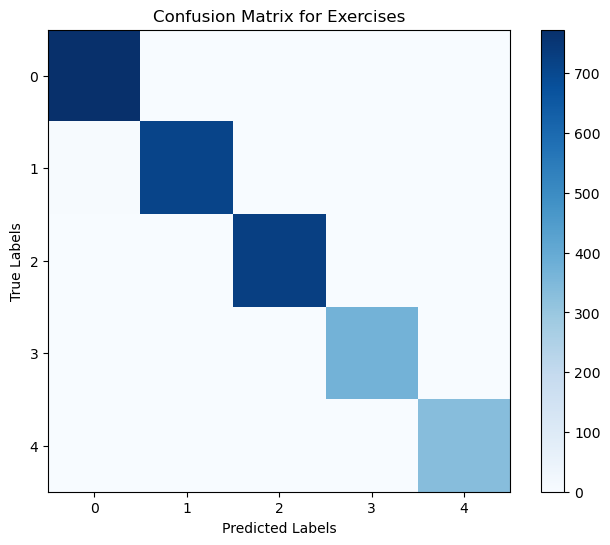

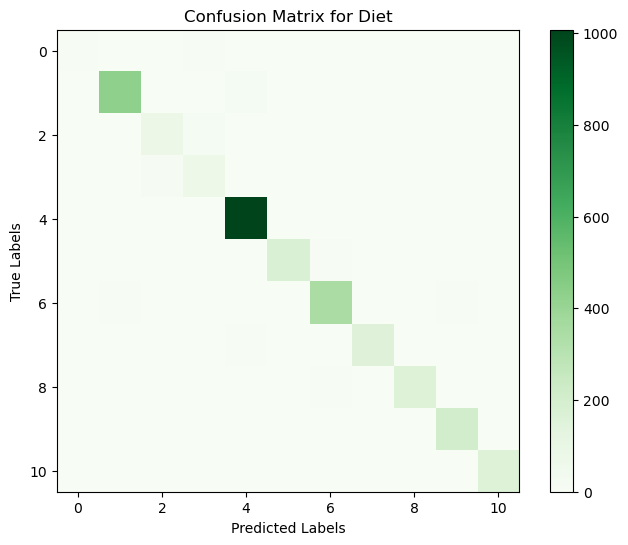

Models and encoders have been saved as .pkl files!


In [13]:
# Evaluating Exercises Model
y_pred_exercises = rf_exercises.predict(X_test_exercises)
print("Exercise Model Evaluation:")
print(classification_report(y_test_exercises, y_pred_exercises))

# Evaluating Diet Model
y_pred_diet = rf_diet.predict(X_test_diet)
print("Diet Model Evaluation:")
print(classification_report(y_test_diet, y_pred_diet))

# Ploting confusion matrix for Exercises Model
conf_matrix_exercises = confusion_matrix(y_test_exercises, y_pred_exercises)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_exercises, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix for Exercises")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.colorbar()
plt.show()

# Ploting confusion matrix for Diet Model
conf_matrix_diet = confusion_matrix(y_test_diet, y_pred_diet)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_diet, cmap='Greens', interpolation='nearest')
plt.title("Confusion Matrix for Diet")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.colorbar()
plt.show()

# Save models and encoders files
joblib.dump(rf_exercises, 'rf_exercises_model.pkl')
joblib.dump(rf_diet, 'rf_diet_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("Models and encoders have been saved as .pkl files!")

<h2> Step 5 Model Evaluation </h2>
<h4> Exercises Model Accuracy: 99.79%<br><br>
Diet Model Accuracy: 94.99%
<h4>

In [22]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Exercises Model
accuracy_exercises = rf_exercises.score(X_test_exercises, y_test_exercises)

# Calculate accuracy for Diet Model
accuracy_diet = rf_diet.score(X_test_diet, y_test_diet)

# Print the accuracies
print(f"Exercise Prediction Model Accuracy: {accuracy_exercises * 100:.2f}%")
print(f"Diet Recommendation Model Accuracy: {accuracy_diet * 100:.2f}%")

Exercise Prediction Model Accuracy: 99.76%
Diet Recommendation Model Accuracy: 94.89%


<h2> Step 6 Web App </h2>
<h4> The models are tained but in order to test it or use it we decided to make a web app where the user can fill out his or her information and the model predicts the best suitable diet and exercises. 
<h4>

<h3>app.py<h3>

In [23]:
from flask import Flask, request, render_template, jsonify
import joblib

app = Flask(__name__)

# Load models and encoders
rf_exercises = joblib.load('rf_exercises_model.pkl')
rf_diet = joblib.load('rf_diet_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form data
        user_features = [
            int(request.form['Sex']),
            int(request.form['Age']),
            float(request.form['Height']),
            float(request.form['Weight']),
            float(request.form['BMI']),
            int(request.form['Hypertension']),
            int(request.form['Diabetes']),
            int(request.form['Level']),
            int(request.form['Fitness Goal']),
            int(request.form['Fitness Type'])
        ]

        # Predict Exercise
        exercise_prediction = rf_exercises.predict([user_features])[0]
        # Predict Diet
        diet_prediction = rf_diet.predict([user_features])[0]

        # Decode predictions with error handling
        exercise_result = label_encoders['Exercises'].inverse_transform([exercise_prediction])[0]
        diet_result = label_encoders['Diet'].inverse_transform([diet_prediction])[0]

        return render_template('result.html', exercise=exercise_result, diet=diet_result)
    except KeyError as ke:
        return render_template('error.html', error=f"Missing key: {ke}")
    except Exception as e:
        return render_template('error.html', error=str(e))


if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\bhumi\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<h4> index.html 
<h4>

In [24]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Health and Fitness Recommendation</title>
    <!-- Bootstrap CSS -->
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
</head>
<body class="bg-light">
    <div class="container py-5">
        <div class="row justify-content-center">
            <div class="col-md-8">
                <div class="card shadow">
                    <div class="card-header bg-primary text-white text-center">
                        <h1>Health and Fitness Recommendation System</h1>
                    </div>
                    <div class="card-body">
                        <form action="/predict" method="post" class="needs-validation" novalidate>
                            <div class="mb-3">
                                <label for="sex" class="form-label">Sex (0 for Female, 1 for Male):</label>
                                <input type="number" id="sex" name="Sex" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="age" class="form-label">Age:</label>
                                <input type="number" id="age" name="Age" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="height" class="form-label">Height (in cms):</label>
                                <input type="number" step="0.01" id="height" name="Height" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="weight" class="form-label">Weight (in kg):</label>
                                <input type="number" step="0.1" id="weight" name="Weight" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="bmi" class="form-label">BMI:</label>
                                <input type="number" step="0.1" id="bmi" name="BMI" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="hypertension" class="form-label">Hypertension (0 for No, 1 for Yes):</label>
                                <input type="number" id="hypertension" name="Hypertension" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="diabetes" class="form-label">Diabetes (0 for No, 1 for Yes):</label>
                                <input type="number" id="diabetes" name="Diabetes" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="level" class="form-label">Fitness Level (e.g., 0 for Beginner, 1 for Intermediate):</label>
                                <input type="number" id="level" name="Level" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="fitness_goal" class="form-label">Fitness Goal (e.g., 0 for Weight Gain, 1 for Weight Loss):</label>
                                <input type="number" id="fitness_goal" name="Fitness Goal" class="form-control" required>
                            </div>

                            <div class="mb-3">
                                <label for="fitness_type" class="form-label">Fitness Type (e.g., 0 for Cardio, 1 for Strength):</label>
                                <input type="number" id="fitness_type" name="Fitness Type" class="form-control" required>
                            </div>

                            <button type="submit" class="btn btn-success w-100">Get Recommendations</button>
                        </form>
                    </div>
                </div>
            </div>
        </div>
    </div>

    <!-- Bootstrap JS -->
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>


SyntaxError: invalid syntax (3129184730.py, line 1)

<h4> result.html
<h4>

In [25]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Recommendations</title>
    <!-- Bootstrap CSS -->
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
</head>
<body class="bg-light">
    <div class="container mt-5">
        <div class="card shadow-sm">
            <div class="card-header bg-primary text-white">
                <h1 class="text-center fs-1">Recommendations</h1>
            </div>
            <div class="card-body">
                <p class="fs-4"><strong>Exercise:</strong> {{ exercise }}</p>
                <p class="fs-4"><strong>Diet:</strong> {{ diet }}</p>
            </div>
            <div class="card-footer text-center">
                <a href="/" class="btn btn-secondary btn-lg">Back to Home</a>
            </div>
        </div>
    </div>

    <!-- Bootstrap JS Bundle -->
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>


SyntaxError: invalid syntax (2740897670.py, line 1)